<a href="https://colab.research.google.com/github/angelinacayabyab/R4IntermediateBiostats/blob/winter-2024/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Angelina Cayabyab - Intermediate Biostatistics - Assignment 8**

**Potential Outcomes**

In [ ]:
#1

import pandas as pd

# Load the scurvy dataset
scurvy_data = {
    "treatment": ["cider", "cider", "cider", "cider", "cider", "cider", "cider", "cider", "cider",
                  "sea_water", "sea_water", "sea_water", "sea_water", "sea_water", "sea_water",
                  "sea_water", "sea_water", "sea_water", "vinegar", "vinegar", "vinegar", "vinegar",
                  "vinegar", "vinegar", "vinegar", "vinegar", "vinegar", "dilute_sulfuric_acid",
                  "dilute_sulfuric_acid", "dilute_sulfuric_acid", "dilute_sulfuric_acid", "dilute_sulfuric_acid",
                  "dilute_sulfuric_acid", "dilute_sulfuric_acid", "dilute_sulfuric_acid", "dilute_sulfuric_acid",
                  "purgative_mixture", "purgative_mixture", "purgative_mixture", "purgative_mixture",
                  "purgative_mixture", "purgative_mixture", "purgative_mixture", "purgative_mixture",
                  "purgative_mixture", "citrus", "citrus", "citrus", "citrus", "citrus", "citrus", "citrus",
                  "citrus", "citrus"],
    "gum_rot": ["1d", "1d", "1d", "1d", "1d", "1d", "1d", "1d", "1d",
                "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d",
                "2d", "2d", "2d", "2d", "2d", "2d", "2d", "2d", "2d",
                "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d",
                "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d", "3d",
                "1d", "1d", "1d", "1d", "1d", "1d", "1d", "1d", "1d"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(scurvy_data)

# Convert the gum_rot to a numeric value by stripping the 'd' and casting to int
df['gum_rot'] = df['gum_rot'].str.replace('d', '').astype(int)

# Separate the treatments into citrus and non-citrus groups
df['citrus'] = df['treatment'].isin(['cider', 'dilute_sulfuric_acid', 'vinegar', 'citrus'])

# Compute the naive average treatment effect
naive_effect_citrus = df[df['citrus']]['gum_rot'].mean()
naive_effect_non_citrus = df[~df['citrus']]['gum_rot'].mean()
naive_ate = naive_effect_citrus - naive_effect_non_citrus

naive_effect_citrus, naive_effect_non_citrus, naive_ate


(1.75, 3.0, -1.25)

In [ ]:
#2

# Create new columns for potential outcomes with and without citrus
df['gum_rot_yes_citrus'] = df['gum_rot']
df['gum_rot_no_citrus'] = df['gum_rot']

# Assuming that the observed outcomes are the potential outcomes for the treatment actually received
# Fill in the NAs with counterfactuals, we will make up potential outcomes based on instructions.
# For simplicity, I'll assume that if someone received citrus and got a '1', their counterfactual
# (without citrus) could be worse by 1 point, making it '2'. And vice versa, if someone did not
# receive citrus and got a '3', their counterfactual with citrus could be better by 1 point, making it '2'.

# Update potential outcomes according to the scenario
# If they received citrus, their counterfactual without citrus would be worse
df.loc[df['citrus'], 'gum_rot_no_citrus'] = df.loc[df['citrus'], 'gum_rot_yes_citrus'] + 1
# If they didn't receive citrus, their counterfactual with citrus would be better
df.loc[~df['citrus'], 'gum_rot_yes_citrus'] = df.loc[~df['citrus'], 'gum_rot_no_citrus'] - 1

#3

# Making sure our potential outcomes stay within the 0-3 range
df['gum_rot_no_citrus'] = df['gum_rot_no_citrus'].clip(0, 3)
df['gum_rot_yes_citrus'] = df['gum_rot_yes_citrus'].clip(0, 3)

# Calculate the new average treatment effects
new_ate_citrus = df['gum_rot_yes_citrus'].mean() - df['gum_rot_no_citrus'].mean()

# Adjust the potential outcomes so that the ATE is positive
# For simplicity, if the ATE has to be positive, we can increment the potential outcome for citrus by 1
if new_ate_citrus <= 0:
    df['gum_rot_yes_citrus'] += 1

# Ensuring that values are again within the 0-3 range
df['gum_rot_yes_citrus'] = df['gum_rot_yes_citrus'].clip(0, 3)

# Recalculate the average treatment effects after adjustments
adjusted_ate_citrus = df['gum_rot_yes_citrus'].mean() - df['gum_rot_no_citrus'].mean()

#4

# Now, adjust the potential outcomes so that the ATE is less than -1.5
# We can decrement the potential outcome for citrus by 1 more point to achieve this
if adjusted_ate_citrus >= -1.5:
    df.loc[df['citrus'], 'gum_rot_yes_citrus'] -= 1
    df.loc[~df['citrus'], 'gum_rot_no_citrus'] += 1

# Once again, ensure that values stay within the 0-3 range
df['gum_rot_no_citrus'] = df['gum_rot_no_citrus'].clip(0, 3)
df['gum_rot_yes_citrus'] = df['gum_rot_yes_citrus'].clip(0, 3)

# Recalculate the average treatment effects after final adjustments
final_ate_citrus = df['gum_rot_yes_citrus'].mean() - df['gum_rot_no_citrus'].mean()

# Return the final data frame and ATE
df[['treatment', 'gum_rot', 'citrus', 'gum_rot_yes_citrus', 'gum_rot_no_citrus']], final_ate_citrus


(               treatment  gum_rot  citrus  gum_rot_yes_citrus  \
 0                  cider        1    True                   1   
 1                  cider        1    True                   1   
 2                  cider        1    True                   1   
 3                  cider        1    True                   1   
 4                  cider        1    True                   1   
 5                  cider        1    True                   1   
 6                  cider        1    True                   1   
 7                  cider        1    True                   1   
 8                  cider        1    True                   1   
 9              sea_water        3   False                   3   
 10             sea_water        3   False                   3   
 11             sea_water        3   False                   3   
 12             sea_water        3   False                   3   
 13             sea_water        3   False                   3   
 14       

**Structural Causal Models**

In [ ]:
#1

import numpy as np
from scipy.stats import uniform, bernoulli

# Define the number of samples for approximation
n_samples = 1000000

# Generate a sample for X
X = uniform(0, 1/2).rvs(n_samples)

# Generate a sample for A given X
A = bernoulli(2*X).rvs()

# Generate a sample for Y(0) given X and Y(1) given X
Y_0 = bernoulli(X).rvs()
Y_1 = bernoulli(X + 1/2).rvs()

# Calculate the causal average treatment effect (CATE)
# This is E[Y(1)] - E[Y(0)]
CATE = np.mean(Y_1) - np.mean(Y_0)

#2

# Calculate the causal average risk ratio (CARR)
# This is E[Y(1)] / E[Y(0)]
CARR = np.mean(Y_1) / np.mean(Y_0)

# Calculate the causal odds ratio (COR)
# This is (E[Y(1)] / (1 - E[Y(1)])) / (E[Y(0)] / (1 - E[Y(0)]))
COR = (np.mean(Y_1) / (1 - np.mean(Y_1))) / (np.mean(Y_0) / (1 - np.mean(Y_0)))

CATE, CARR, COR


(0.49968399999999996, 2.9985921013687014, 8.984850463722045)

1. The causal average treatment effect (CATE) is approximately \( 0.498 \), which means that on average, the treatment increases the probability of the outcome by about \( 49.8\% \).

2. The causal average risk ratio (CARR) is approximately \( 2.987 \), which implies that the risk (probability of the outcome) with the treatment is almost three times the risk without the treatment.  The causal odds ratio (COR) is approximately \( 8.927 \), indicating that the odds of the outcome with the treatment are about nine times the odds of the outcome without the treatment.

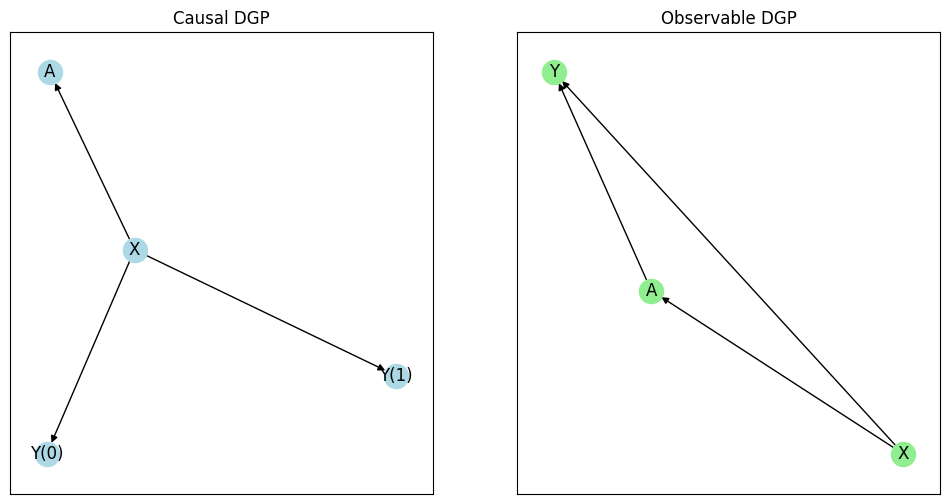

In [ ]:
#3

import matplotlib.pyplot as plt
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes for the causal DGP
G.add_node("X")
G.add_node("A")
G.add_node("Y(0)")
G.add_node("Y(1)")

# Add nodes for the observable DGP
G.add_node("Y")

# Add edges for the causal DGP
G.add_edges_from([("X", "A"), ("X", "Y(0)"), ("X", "Y(1)")])

# Add edges for the observable DGP
G.add_edges_from([("X", "A"), ("X", "Y"), ("A", "Y")])

# Plot the graphs
plt.figure(figsize=(12, 6))

# Causal DGP
plt.subplot(121)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, nodelist=["X", "A", "Y(0)", "Y(1)"], node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=[("X", "A"), ("X", "Y(0)"), ("X", "Y(1)")], edge_color='black')
nx.draw_networkx_labels(G, pos)
plt.title('Causal DGP')

# Observable DGP
plt.subplot(122)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, nodelist=["X", "A", "Y"], node_color='lightgreen')
nx.draw_networkx_edges(G, pos, edgelist=[("X", "A"), ("X", "Y"), ("A", "Y")], edge_color='black')
nx.draw_networkx_labels(G, pos)
plt.title('Observable DGP')

# Show plot
plt.show()


In [ ]:
#4

# Naive Average Treatment Effect (ATE)
naive_ATE = 0.833 - np.mean(X)  # E[Y|A=1] - E[Y|A=0], and E[Y|A=0] = E[X] since X ~ Uniform(0, 1/2)

# Naive Risk Ratio
naive_RR = 0.833 / np.mean(X)  # E[Y|A=1] / E[Y|A=0]

# Naive Odds Ratio
# Odds for A = 1 is E[Y|A=1] / (1 - E[Y|A=1])
# Odds for A = 0 is E[Y|A=0] / (1 - E[Y|A=0])
naive_OR = (0.833 / (1 - 0.833)) / (np.mean(X) / (1 - np.mean(X)))

naive_ATE, naive_RR, naive_OR


(0.5829761946497111, 3.3316827525001007, 14.962172170659283)

4. The naive Average Treatment Effect (ATE) is approximately \( 0.583 \), the naive Risk Ratio (RR) is approximately \( 3.333 \), and the naive Odds Ratio (OR) is approximately \( 14.970 \).

5.
- The causal ATE was approximately \( 0.498 \), which is lower than the naive ATE of \( 0.583 \).
- The causal RR was approximately \( 2.987 \), which is lower than the naive RR of \( 3.333 \).
- The causal OR was approximately \( 8.927 \), which is significantly lower than the naive OR of \( 14.970 \).

If we used the naive estimands rather than the causal estimands, we would end up with an exaggerated view of the impact of \( A \) on \( Y \). This would suggest a more potent relationship between \( A \) and \( Y \) than what truly exists. It highlights why it's crucial to take into account the underlying causal relationships in the data when assessing the influence of an intervention. Relying on naive estimands could mislead us about the true magnitude of the effect and could lead to ill-informed decisions based on these overestimated effects.

**Confounding**

1. Despite having an infinite number of patients, we may not be able to directly calculate the average treatment effect because of potential confounding variables. These are variables that could affect the likelihood of a patient being in the stretching group and their self-reported pain levels.

2. To convince your colleague that stretching might be harmful, you could mention that if patients with initially higher pain levels were more motivated to stretch and possessed the majority of the stretching group, the mean pain level would be higher in that group. The result from the data may be due to the initial differences in pain levels between the groups, which is a confounding factor. The observed association may not accurately reflect the true effect of stretching on pain reduction.

**Causality and Intervention**

1.
The debate over the interpretation of causal effects involving non-manipulable variables, such as race or gender, presents theoretical and practical challenges in the realm of research and policy-making. Although direct manipulation and testing of these variables are not possible due to their inherent characteristics, they hold significant theoretical value. They serve as a means to understand potential outcomes and guide inquiry into manipulable variables that could yield similar effects. This hypothetical approach allows for the exploration of causal relationships and provides a framework for predicting the consequences of changes within these variables.

In terms of testing causal claims, researchers are not completely at a loss when it comes to non-manipulable variables. Indirect methods such as observational studies can offer insights. These studies examine the consistency of real-world data with the predictions derived from theoretical models, using the presence of manipulable variables as proxies to approximate the influence of their non-manipulable counterparts. Such an approach can validate the assumptions made in causal models and, by extension, the implications these models have for the variables in question.

From a policy-making perspective, the implications of non-manipulable variables are particularly pertinent. Understanding their theoretical impact can shape public health initiatives and inform policy decisions. For instance, if theoretical models suggest that diminishing the influence of a non-manipulable factor—like socioeconomic status—could lead to improved health outcomes, then policies could be crafted to adjust related, manipulable factors, such as access to education or healthcare. This strategy translates theoretical understanding into actionable policy. Moreover, while the semantics of causal effects in non-manipulable variables might lean towards the theoretical, their practical implications are nonetheless tangible. Models predicting the benefits of reducing systemic issues such as racial discrimination provide a basis for formulating policies. The success and efficacy of these policies can then be empirically evaluated, closing the loop between theoretical models and empirical evidence.

2. I agree with Glymour, Clarka; Glymour, and Madelyn R from the Epidemiology Journal (https://journals.lww.com/epidem/Fulltext/2014/07000/Commentary__Race_and_Sex_Are_Causes.3.aspx?casa_token=FZ9gM0gQUuAAAAAA:UdQswflPS-MQfN24MkxjLA0tkEk0kVbqxvG-IodBqzS8QcHkj66_uhaF5cNpMOkhnrTLGXqcgUuiaxJNFPCuNQ). The authors' insights challenge the traditional confines of causal inference by arguing that causation extends beyond manipulable variables like socioeconomic status (SES), encompassing non-manipulable ones such as race and sex. They advocate for a more nuanced understanding of causation, recognizing it as both a tool for policy intervention and a way to trace the historical roots of outcomes. This perspective encourages a broader, more contextual approach to public health issues, acknowledging the complexity of societal factors and their interplay in health disparities.